<a href="https://colab.research.google.com/github/kireeti-ai/Machine-Learning-Notes/blob/main/KNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from collections import Counter

In [2]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [3]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

In [4]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

In [5]:
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A


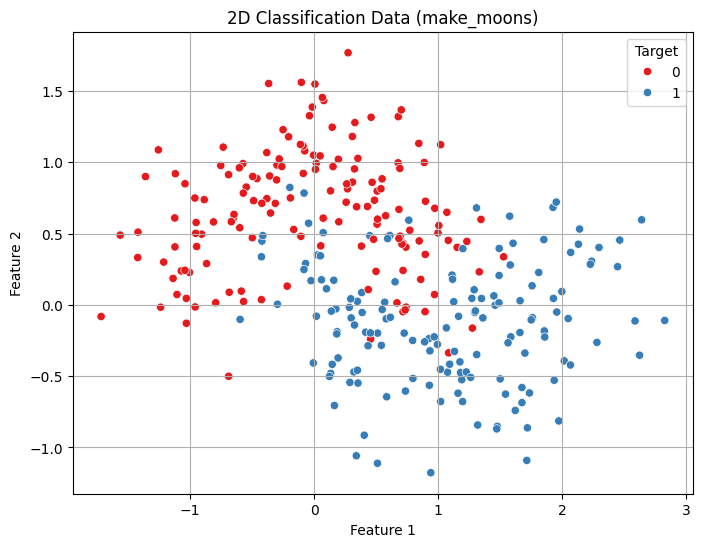

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create synthetic 2D data
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# Create a DataFrame for plotting
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df['Target'] = y

# Visualize the 2D data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="Target", palette="Set1")
plt.title("2D Classification Data (make_moons)")
plt.grid(True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=5): {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy (k=5): 0.87


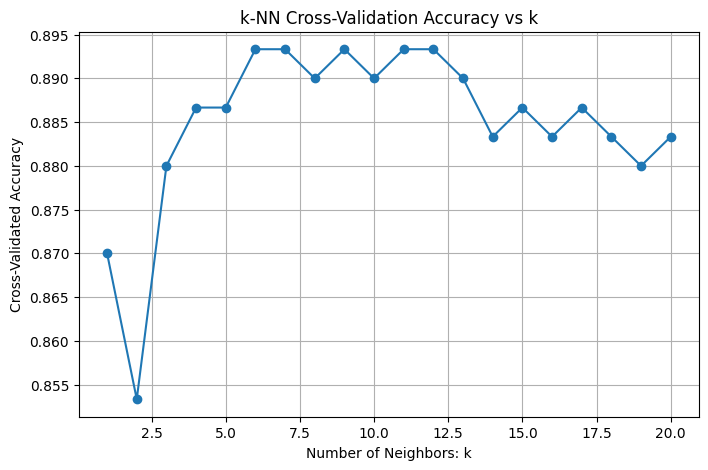

Best k from cross-validation: 6


In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k values to try
k_range = range(1, 21)
cv_scores = []

# Evaluate each k using 5-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

In [12]:
# Train final model with best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict on test data
y_pred = best_knn.predict(X_test)

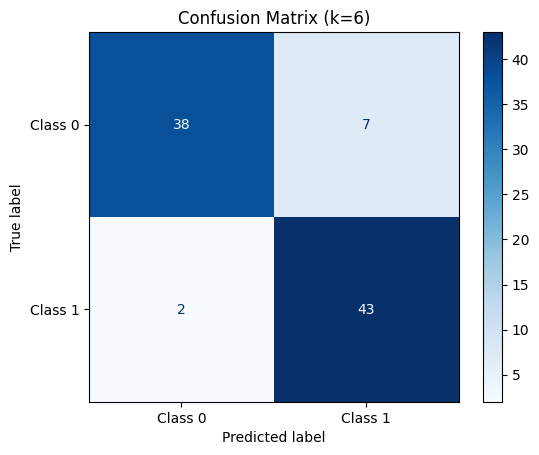

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.84      0.89        45
     Class 1       0.86      0.96      0.91        45

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.91      0.90      0.90        90



In [13]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (k={best_k})")
plt.grid(False)
plt.show()

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

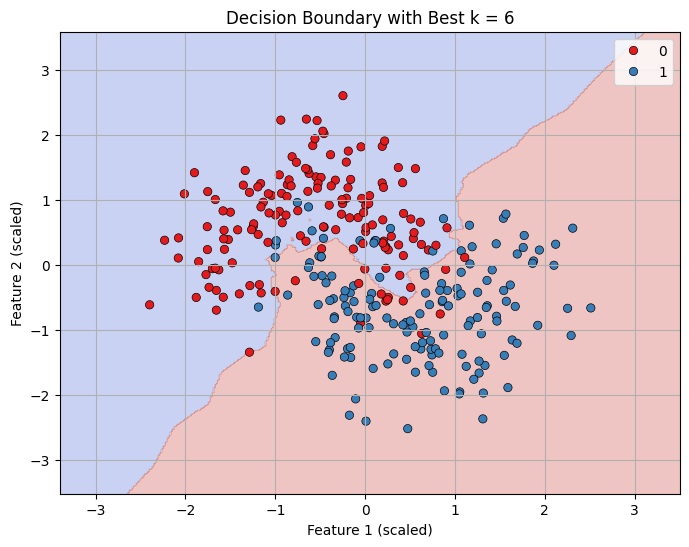

In [16]:
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on mesh grid with best k
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette="Set1", edgecolor='k')
plt.title(f"Decision Boundary with Best k = {best_k}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)
plt.show()